In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px

In [2]:
df = sns.load_dataset('iris')

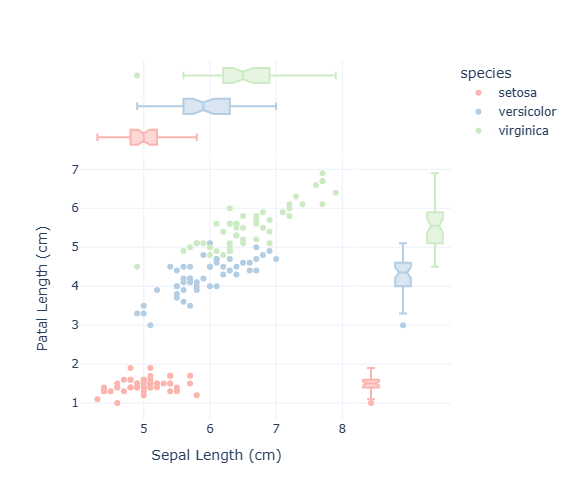

In [3]:
fig = px.scatter(df, x = 'sepal_length', y='petal_length',
                color='species',
                marginal_x='box', marginal_y='box',
                width=600, height=500, template='plotly_white',
                color_discrete_sequence=px.colors.qualitative.Pastel1,
                labels={"sepal_length":"Sepal Length (cm)",
                       "petal_length":"Patal Length (cm)"})
fig.show()

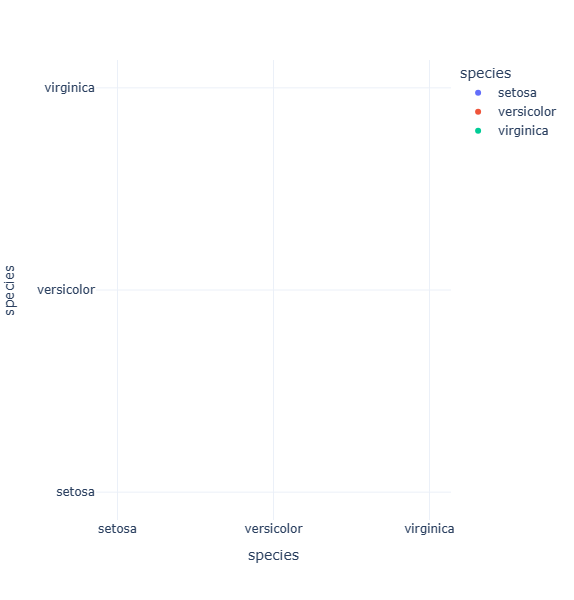

In [4]:
fig = px.scatter_matrix(df,
                       dimensions=[],
                       template='plotly_white',
                       color="species", width=600, height=600)
fig.update_traces(diagonal_visible=False)
fig.show()

In [5]:
df['area'] = df['sepal_length'] * df['sepal_width']

In [6]:
df['Category'] = pd.qcut(df['area'], 5,
                        labels=['A','B','C','D','E'])

In [7]:
list_stats = ['min', 'max', 'mean', 'median', 'std']

In [8]:
stats_by_area = df.groupby('Category')['area'].agg(list_stats)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_42452\1243993549.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [9]:
stats_by_area['Range'] = stats_by_area['max'] - stats_by_area['min']

In [10]:
stats_by_area['Number'] = df['Category'].value_counts()

In [11]:
stats_by_area.to_csv('stats_by_area.csv')

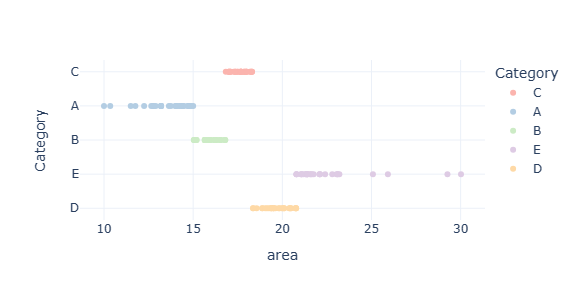

In [12]:
fig = px.scatter(df, x='area', y='Category',
                color='Category',
                template='plotly_white',
                width=600, height=300,
                color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

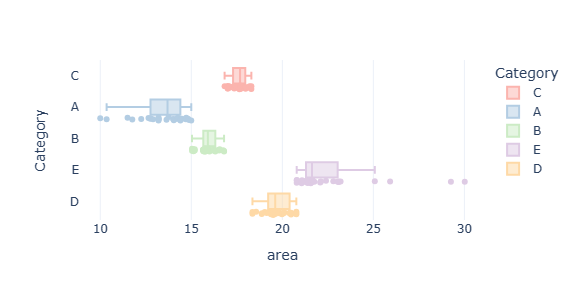

In [14]:
fig = px.box(df, x='area', y='Category',
                color='Category', points="all",
                template='plotly_white',
                width=600, height=300,
                color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

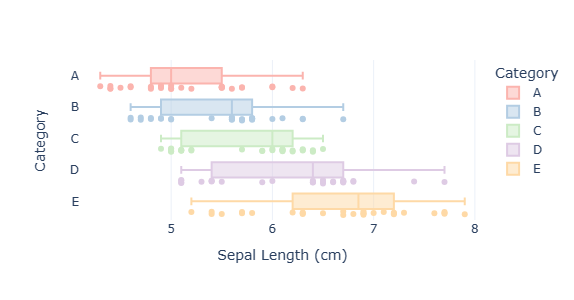

In [16]:
fig = px.box(df, x='sepal_length', y='Category',
                color='Category', points="all",
                template='plotly_white',
                width=600, height=300,
                category_orders={"Category": ['A','B','C','D','E']},
                color_discrete_sequence=px.colors.qualitative.Pastel1,
                labels={'sepal_length': 'Sepal Length (cm)'})
fig.show()

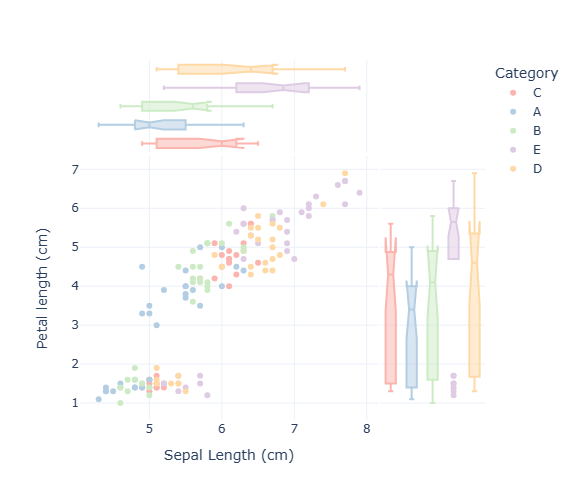

In [17]:
fig = px.scatter(df, x='sepal_length', y='petal_length',
                color='Category',marginal_x='box',
                marginal_y='box',template='plotly_white',
                width=600, height=500,
                color_discrete_sequence=px.colors.qualitative.Pastel1,
                labels={'sepal_length': 'Sepal Length (cm)',
                       'petal_length': 'Petal length (cm)'})
fig.show()

In [20]:
freq_matrix = pd.crosstab(index=df['Category'],
                         columns=df['species'])

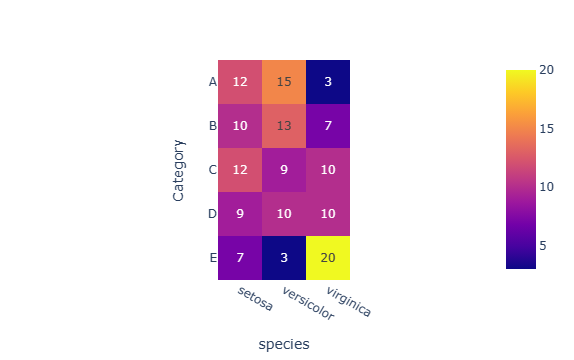

In [21]:
fig = px.imshow(freq_matrix, text_auto=True)
fig.show()

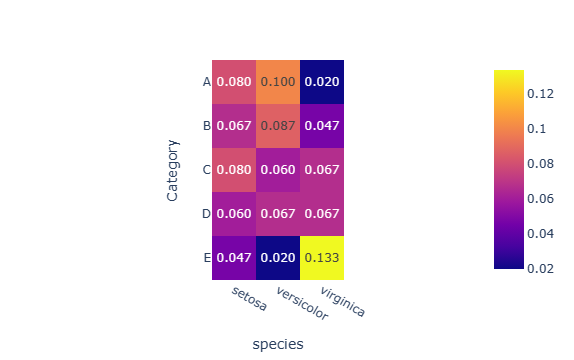

In [22]:
prob_matrix = pd.crosstab(index=df['Category'],
                         columns=df['species'],
                         normalize='all')
fig = px.imshow(prob_matrix, text_auto='.3f')
fig.show()

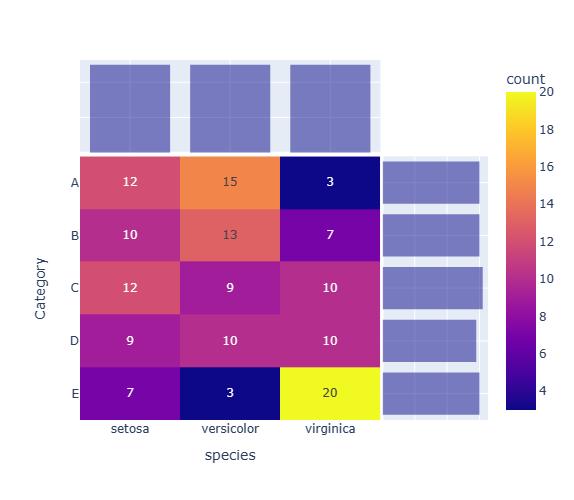

In [24]:
fig = px.density_heatmap(df, x='species', y='Category',
                        category_orders={'Category':
                                        ['A','B','C','D','E']},
                        marginal_x='histogram', marginal_y='histogram',
                        text_auto=True, width=400, height=500)
fig.show()

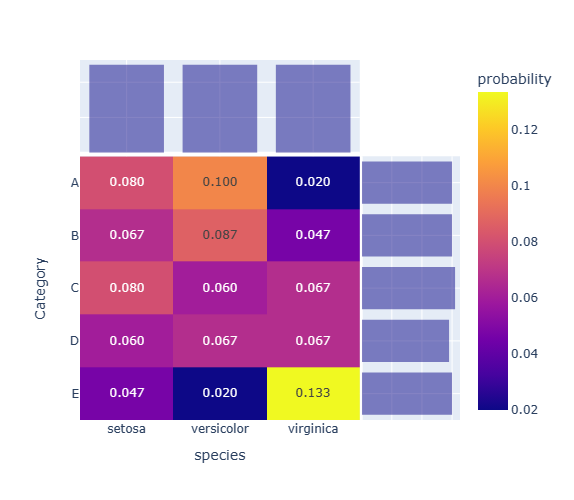

In [25]:
fig = px.density_heatmap(df, x='species', y='Category',
                        category_orders={'Category':
                                        ['A','B','C','D','E']},
                        marginal_x='histogram', marginal_y='histogram',
                        histnorm='probability',
                        text_auto='.3f', width=400, height=500)
fig.show()

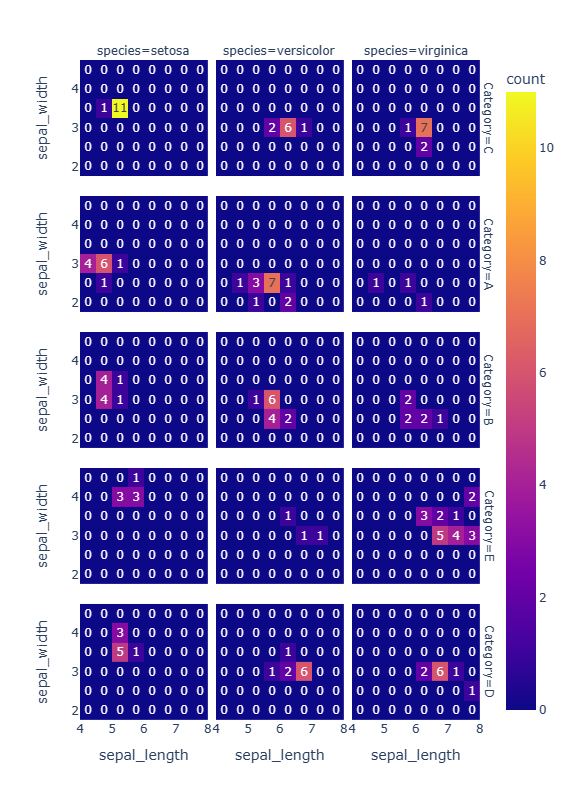

In [27]:
fig = px.density_heatmap(df,
                        x='sepal_length',
                        y='sepal_width',
                        facet_row='Category',
                        facet_col='species',
                        width=500,
                        height=800,
                        text_auto=True)
fig.show()

In [28]:
ctg_percent = df['Category'].value_counts(normalize=True)
ctg_percent = pd.DataFrame({'Category': ctg_percent.index,
                           'Percent': ctg_percent.values})

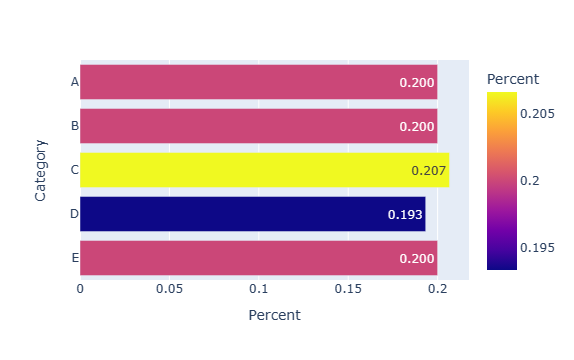

In [29]:
fig = px.bar(ctg_percent,
            x='Percent',y='Category',
            category_orders={'Category': ['A','B','C','D','E']},
            color='Percent', orientation='h',
            text_auto='.3f')
fig.show()

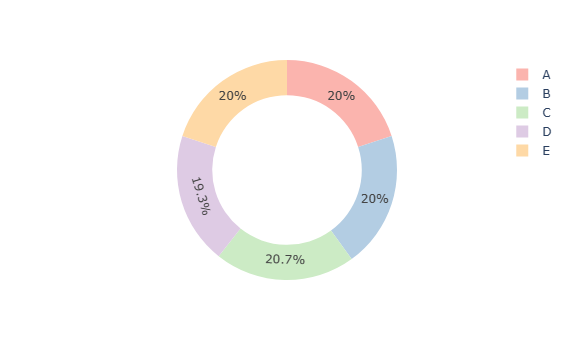

In [31]:
fig = px.pie(ctg_percent, 
            category_orders={'Category': ['A','B','C','D','E']},
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            values='Percent', names='Category')
fig.update_traces(hole=.68)
fig.show()

In [32]:
species_percent = df['species'].value_counts(normalize=True)
species_percent = pd.DataFrame({'species': species_percent.index,
                               'Ratio': species_percent.values})

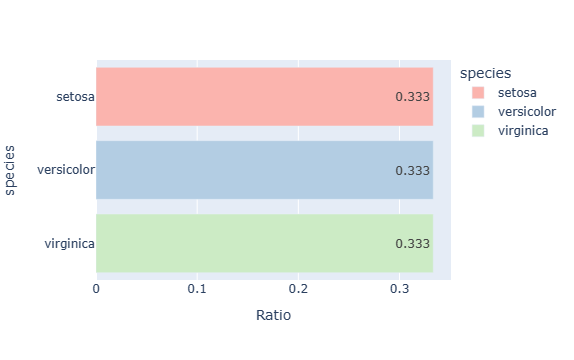

In [34]:
fig = px.bar(species_percent,
            x='Ratio', y='species',
            category_orders={'species':['setosa', 'versicolor', 'virginica']},
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            color='species', orientation='h',
            text_auto='.3f')
fig.show()

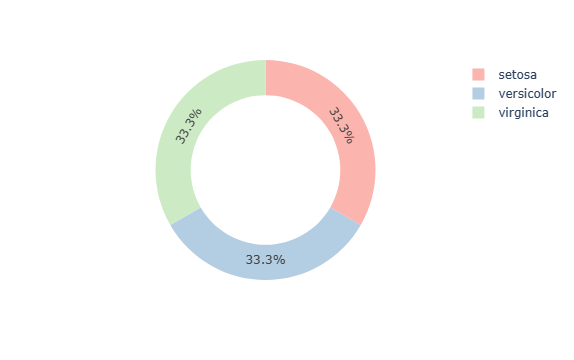

In [35]:
fig = px.pie(species_percent, 
            category_orders={'species': 
                             ['setosa','versicolor','virginica']},
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            values='Ratio', names='species')
fig.update_traces(hole=.68)
fig.show()

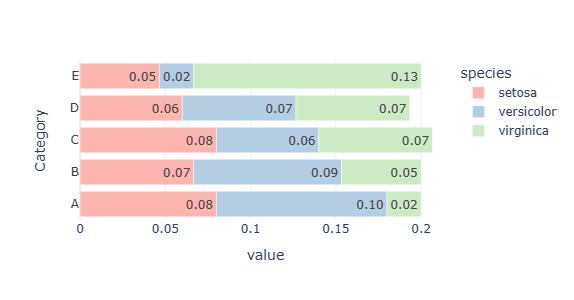

In [36]:
fig = px.bar(prob_matrix,
            template="plotly_white", orientation='h',
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            width=600, height=300, text_auto='.2f')
fig.show()

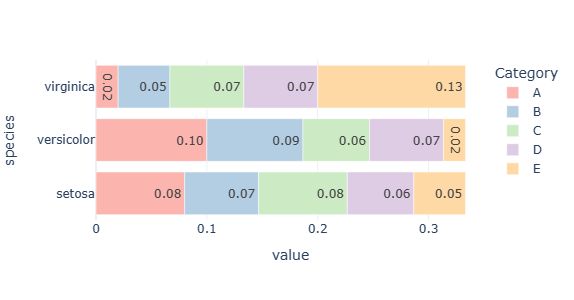

In [37]:
fig = px.bar(prob_matrix.T,
            template="plotly_white", orientation='h',
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            width=600, height=300, text_auto='.2f')
fig.show()

In [38]:
ratio_species_in_category = pd.crosstab(index=df['Category'],
                                       columns=df['species'],
                                       normalize='index')

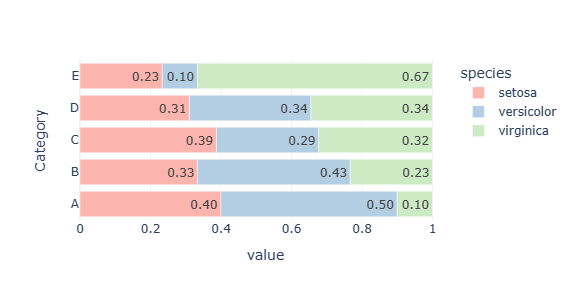

In [39]:
fig = px.bar(ratio_species_in_category,
            template='plotly_white', orientation='h',
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            width=600, height=300, text_auto='.2f')
fig.show()

In [40]:
ratio_category_in_species = pd.crosstab(index=df['species'],
                                       columns=df['Category'],
                                       normalize='index')

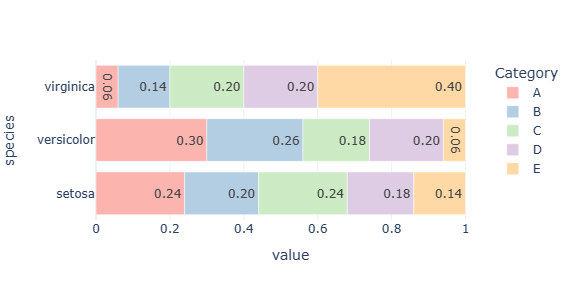

In [41]:
fig = px.bar(ratio_category_in_species,
            template='plotly_white', orientation='h',
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            width=600, height=300, text_auto='.2f')
fig.show()

In [42]:
prob_matrix_stacked = prob_matrix.stack().reset_index().rename(
    columns={0: "Ratio"})

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



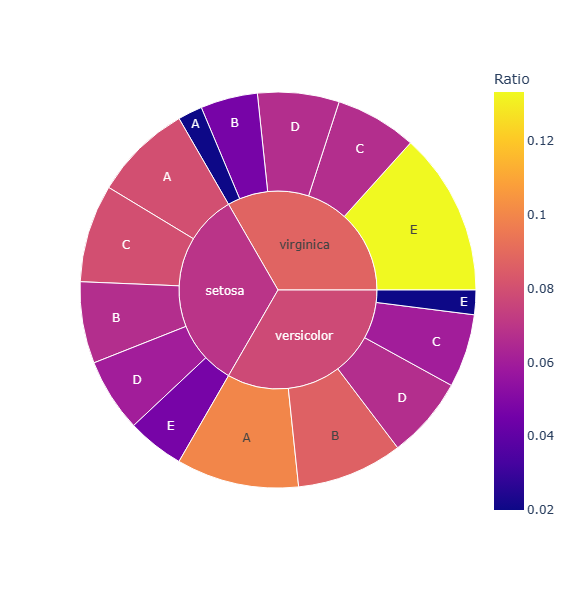

In [43]:
fig = px.sunburst(prob_matrix_stacked,
                 path=['species', 'Category'],
                 values='Ratio', color='Ratio',
                 width=600, height=600)
fig.show()

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



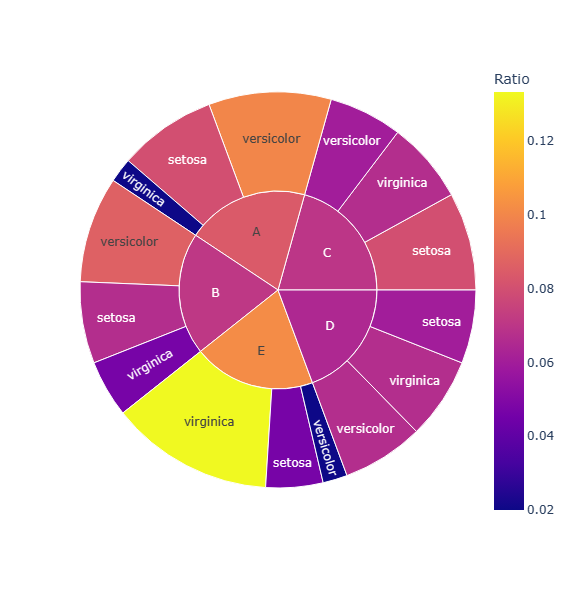

In [44]:
fig = px.sunburst(prob_matrix_stacked,
                 path=['Category', 'species'],
                 values='Ratio', color='Ratio',
                 width=600, height=600)
fig.show()

In [45]:
labels = ["{0} - {1} cm".format(i, i+1) for i in range(4,8)]
df["sepal_length_bins"] = pd.cut(df.sepal_length, range(4,9),
                                right=False, labels=labels)

In [46]:
sepal_length_bins_counts = df['sepal_length_bins'].value_counts()
sepal_length_bins_counts = pd.DataFrame({
    'sepal_length_bins': sepal_length_bins_counts.index,
    'Count': sepal_length_bins_counts.values})

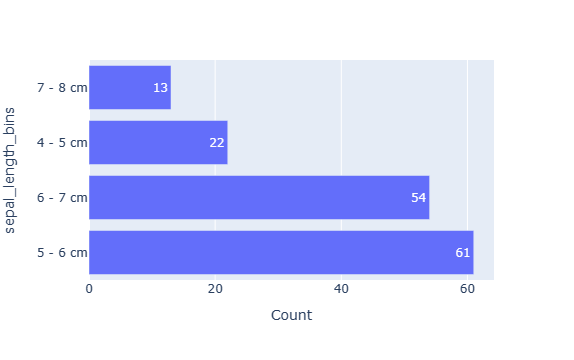

In [47]:
fig = px.bar(sepal_length_bins_counts,
            x='Count', y='sepal_length_bins',
            orientation='h',text_auto=True)
fig.show()

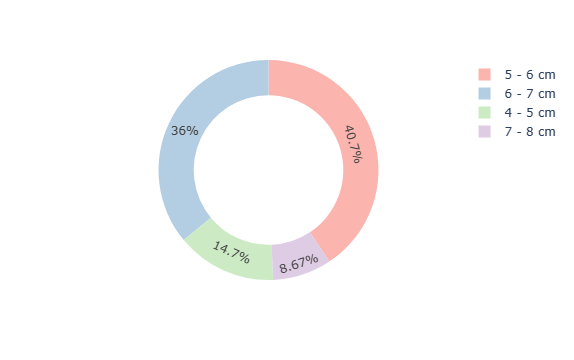

In [48]:
fig = px.pie(sepal_length_bins_counts,
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            values='Count', names='sepal_length_bins')
fig.update_traces(hole=.68)
fig.show()

In [49]:
dims = ['species', 'Category', 'sepal_length_bins']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_42452\3869251548.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



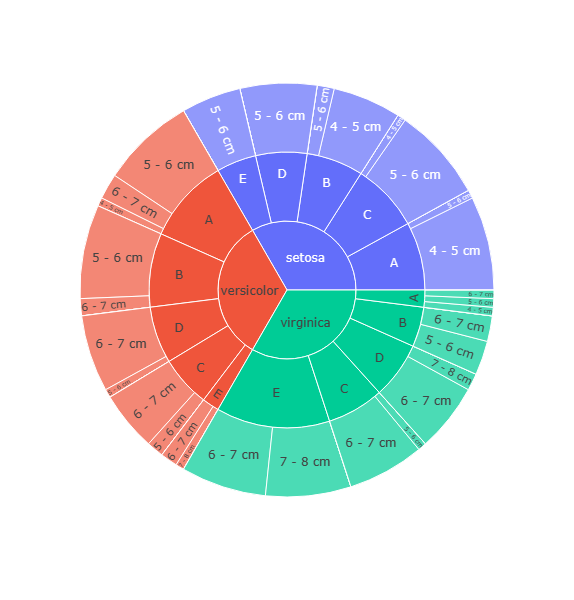

In [52]:
prob_matrix_by_3 = df.groupby(dims)['sepal_length'].apply(
    lambda x: x.count()/len(df))
prob_matrix_by_3 = prob_matrix_by_3.reset_index()
prob_matrix_by_3.rename(columns={'sepal_length':'Ratio'},
                       inplace=True)

fig = px.sunburst(prob_matrix_by_3,
                 path=dims,
                 values='Ratio',
                 width=600, height=600)

fig.show()

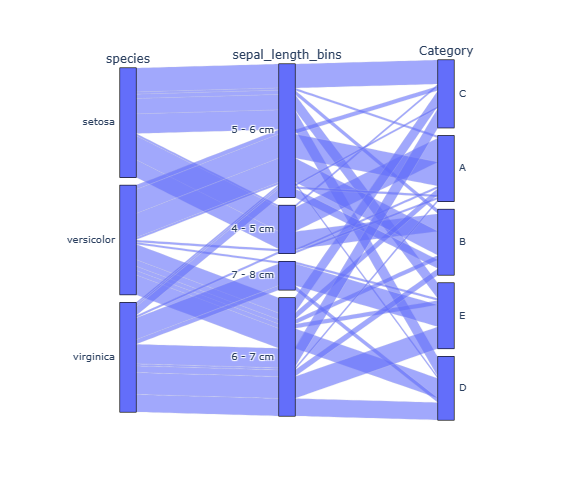

In [55]:
dims_2 = ['species', 'sepal_length_bins', 'Category']
fig = px.parallel_categories(df, 
                            dimensions=dims_2,
                            width=800, height=500)
fig.show()

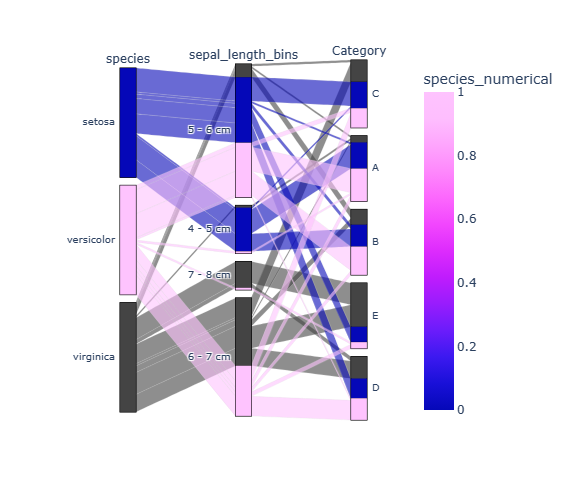

In [56]:
df['species_numerical'] = df['species'].map({
    'setosa': 0, 'versicolor': 1, 'verginica': 2})
cmap=px.colors.sequential.Plotly3

fig =px.parallel_categories(df, dimensions=dims_2,
                           color='species_numerical',
                           color_continuous_scale=cmap,
                           width=800, height=500)
fig.show()

In [57]:
count_matrix = pd.crosstab(index=[df.species, df.Category],
                          columns=df.sepal_length_bins,
                          values=df.petal_length, aggfunc='count')

In [58]:
count_matrix = count_matrix.stack().reset_index()
count_matrix.rename(columns={0:'count'}, inplace=True)
count_matrix = count_matrix[count_matrix['count'] != 0]

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



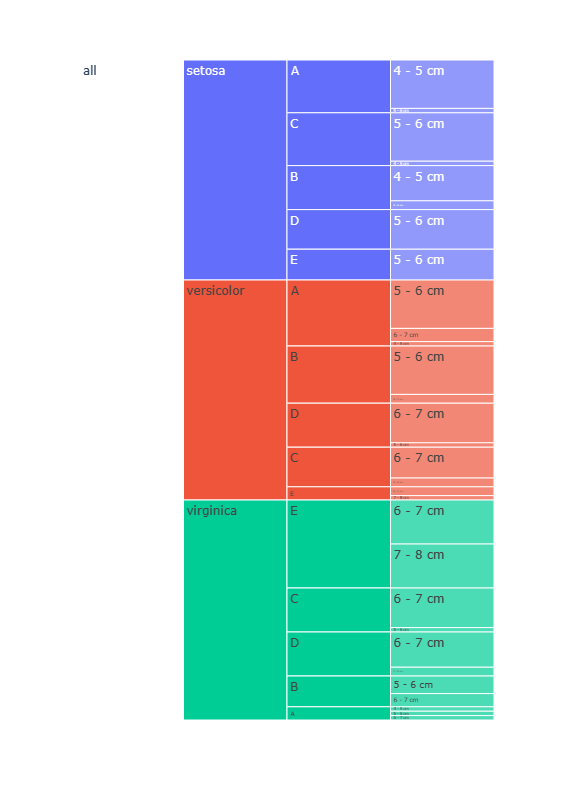

In [59]:
fig = px.icicle(count_matrix,
               path=[px.Constant("all"),
                    'species', 'Category', 'sepal_length_bins'],
               values='count',
               color_continuous_scale='Blues',
               width=600, height=800)
fig.show()

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Administrator\CLionProjects\iris-book1\venv\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



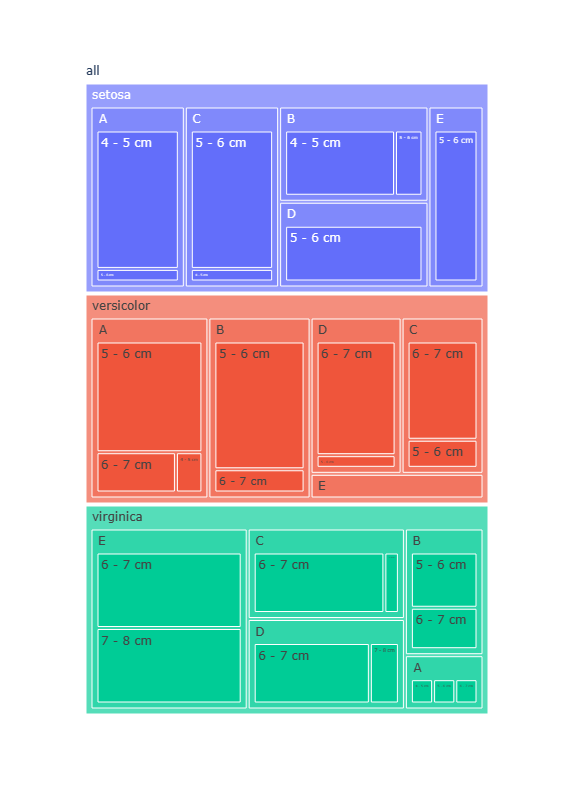

In [61]:
fig = px.treemap(count_matrix,
               path=[px.Constant("all"),
                    'species', 'Category', 'sepal_length_bins'],
               values='count',
               color_continuous_scale='Blues',
               width=600, height=800)
fig.show()

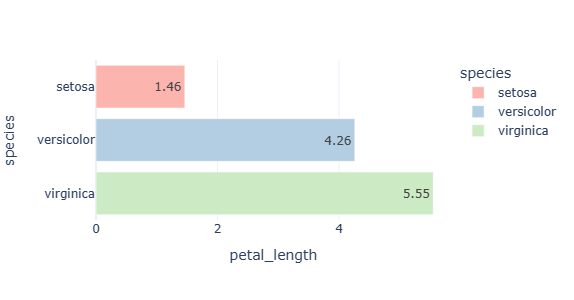

In [62]:
petal_length_mean_by_species = df.groupby([
    'species'])['petal_length'].mean().reset_index()

fig = px.bar(petal_length_mean_by_species,
            x='petal_length', y='species',
            color='species',
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            width=600, height=300,
            text_auto='.2f', orientation='h',
            template='plotly_white')
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_42452\4276436866.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



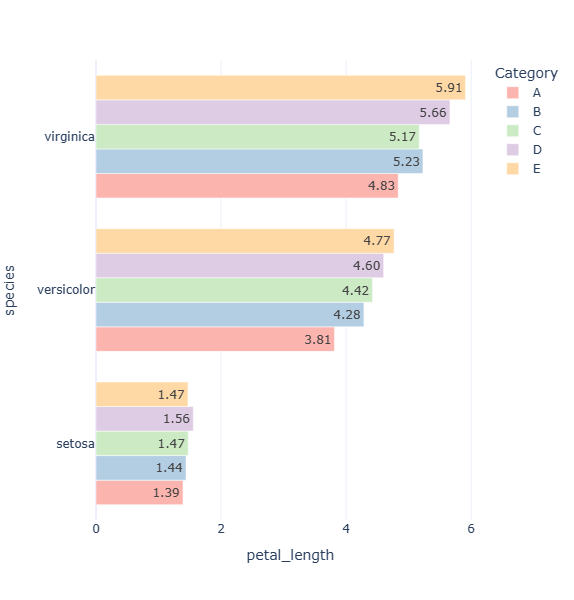

In [66]:
petal_length_mean_by_species_ctgr = df.groupby(
    ['Category', 'species'])['petal_length'].mean().reset_index()

pd.crosstab(index=df.species, columns=df.Category,
           values=df.petal_length, aggfunc='mean')

fig = px.bar(petal_length_mean_by_species_ctgr,
            x='petal_length', y='species',
            color='Category', barmode='group',
            text_auto='.2f', orientation='h',
            width=600, height=600,
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            template='plotly_white')
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_42452\3850598644.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



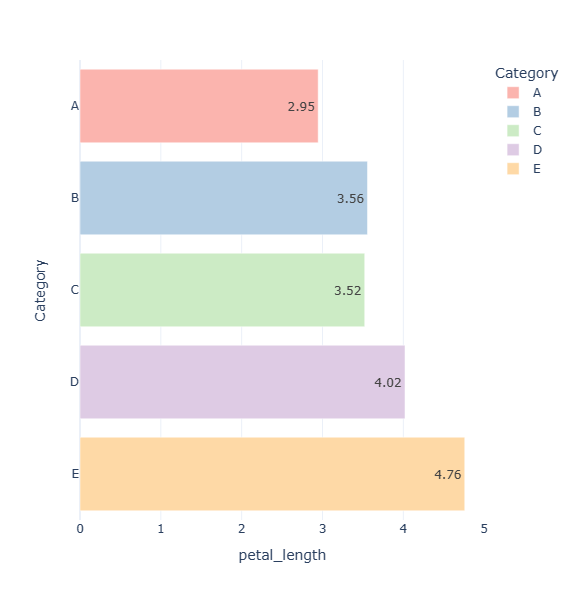

In [67]:
petal_length_mean_by_ctgr = df.groupby([
    'Category'])['petal_length'].mean().reset_index()
fig = px.bar(petal_length_mean_by_ctgr,
            x='petal_length', y='Category',
            color='Category',
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            width=600, height=600,
            text_auto='.2f', orientation='h',
            template='plotly_white')
fig.show()

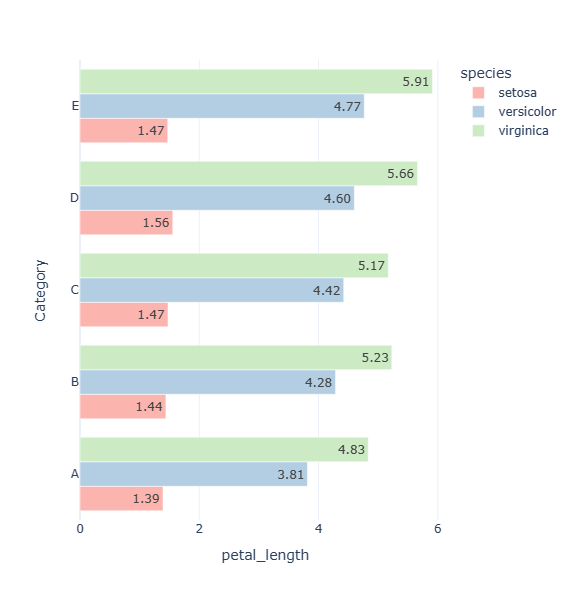

In [69]:
fig = px.bar(petal_length_mean_by_species_ctgr,
            x='petal_length', y='Category',
            color='species', barmode='group',
            color_discrete_sequence=px.colors.qualitative.Pastel1,
            width=600, height=600,
            text_auto='.2f', orientation='h',
            template='plotly_white')
fig.show()

In [70]:
pd.crosstab(index=df.sepal_length_bins,
           columns=[df.species, df.Category],
           values=df.petal_length, aggfunc='mean')

species              setosa                                      versicolor  \
Category                  A      B         C         D         E          A   
sepal_length_bins                                                             
4 - 5 cm           1.372727  1.475  1.400000       NaN       NaN   3.300000   
5 - 6 cm           1.600000  1.300  1.481818  1.555556  1.471429   3.727273   
6 - 7 cm                NaN    NaN       NaN       NaN       NaN   4.300000   
7 - 8 cm                NaN    NaN       NaN       NaN       NaN        NaN   

species                                              virginica            \
Category                  B         C         D    E         A         B   
sepal_length_bins                                                          
4 - 5 cm                NaN       NaN       NaN  NaN       4.5       NaN   
5 - 6 cm           4.154545  4.200000  4.800000  NaN       5.0  5.050000   
6 - 7 cm           5.000000  4.485714  4.577778  4.8       5.0  5.466667   
7 - 8 cm                NaN       NaN       NaN  4.7       NaN       NaN   

species                                  
Category                  C     D     E  
sepal_length_bins                        
4 - 5 cm                NaN   NaN   NaN  
5 - 6 cm           5.100000   NaN   NaN  
6 - 7 cm           5.177778  5.45  5.56  
7 - 8 cm                NaN  6.50  6.26

In [71]:
pd.crosstab(index=[df.species, df.Category],
           columns=df.sepal_length_bins,
           values=df.petal_length, aggfunc='mean')

sepal_length_bins    4 - 5 cm  5 - 6 cm  6 - 7 cm  7 - 8 cm
species    Category                                        
setosa     A         1.372727  1.600000       NaN       NaN
           B         1.475000  1.300000       NaN       NaN
           C         1.400000  1.481818       NaN       NaN
           D              NaN  1.555556       NaN       NaN
           E              NaN  1.471429       NaN       NaN
versicolor A         3.300000  3.727273  4.300000       NaN
           B              NaN  4.154545  5.000000       NaN
           C              NaN  4.200000  4.485714       NaN
           D              NaN  4.800000  4.577778       NaN
           E              NaN       NaN  4.800000      4.70
virginica  A         4.500000  5.000000  5.000000       NaN
           B              NaN  5.050000  5.466667       NaN
           C              NaN  5.100000  5.177778       NaN
           D              NaN       NaN  5.450000      6.50
           E              NaN       NaN  5.560000      6.26